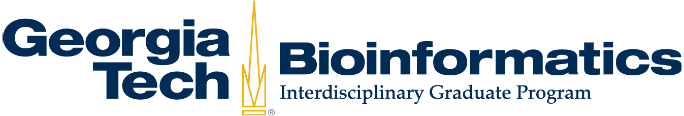

## Variant Calling

### BIOS 4150/BIOL 6150
#### Instructor: Dr. King Jordan
#### TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)


---

# **1. Preparing for variant calling**

---

<div class="alert alert-block alert-warning">
    <h3>1.1 Samtools pileup file</h3>
    <p>We created a SAM file last time and now let's look at what a pileup file is.</p>
</div>

## Here: https://en.wikipedia.org/wiki/Pileup_formatm

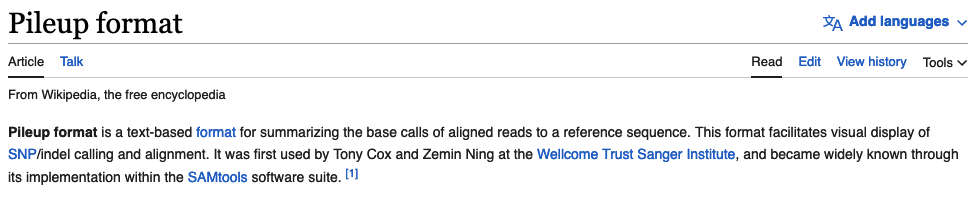

In [2]:
#Move the file.
!mkdir -p ~/scratch/VariantCalling/
!cp ~/scratch/ReadAlignment/chr16.fa* ~/scratch/VariantCalling/
!cp ~/scratch/ReadAlignment/SRR710118.sam ~/scratch/VariantCalling/

!ls -lh ~/scratch/VariantCalling/

total 14G
-rw-r--r-- 1 ssharma454 gtperson 88M Oct 18 00:57 chr16.fa
-rw-r--r-- 1 ssharma454 gtperson 111 Oct 18 00:57 chr16.fa.amb
-rw-r--r-- 1 ssharma454 gtperson  42 Oct 18 00:57 chr16.fa.ann
-rw-r--r-- 1 ssharma454 gtperson 87M Oct 18 00:57 chr16.fa.bwt
-rw-r--r-- 1 ssharma454 gtperson 22M Oct 18 00:57 chr16.fa.pac
-rw-r--r-- 1 ssharma454 gtperson 44M Oct 18 00:57 chr16.fa.sa
-rw-r--r-- 1 ssharma454 gtperson 13G Oct 18 00:57 SRR710118.sam


In [3]:
#Run the pileup command.
!samtools mpileup -f ~/scratch/VariantCalling/chr16.fa ~/scratch/VariantCalling/SRR710118.sam > SRR710118.mpileup


[mpileup] 1 samples in 1 input files
[E::bam_plp_push] The input is not sorted (reads out of order)
samtools mpileup: error reading from input file


<div class="alert alert-block alert-danger">
    <h3>1.1 Errors are good!</h3>
    <p>What is the difference between a regular SAM file and a sorted SAM file.</p>
</div>

In [5]:
#Run the pileup command.
!samtools mpileup -f ~/scratch/VariantCalling/chr16.fa ~/biol6150/Data/SRR710118.sorted.bam > ~/scratch/VariantCalling/SRR710118.mpileup


[mpileup] 1 samples in 1 input files


<div class="alert alert-block alert-info">
    <h3>1.3 Difference between single and multi-sample variant calling</h3>
    <p>Files can either be pileup or mpileup. Think why that might be?</p>
    <h4>When calling variants, always check the documentation for these things</h4>
</div>

In [7]:
#Check the file.
!ls -lh ~/scratch/VariantCalling/


total 15G
-rw-r--r-- 1 ssharma454 gtperson  88M Oct 18 00:57 chr16.fa
-rw-r--r-- 1 ssharma454 gtperson  111 Oct 18 00:57 chr16.fa.amb
-rw-r--r-- 1 ssharma454 gtperson   42 Oct 18 00:57 chr16.fa.ann
-rw-r--r-- 1 ssharma454 gtperson  87M Oct 18 00:57 chr16.fa.bwt
-rw-r--r-- 1 ssharma454 gtperson   23 Oct 18 00:58 chr16.fa.fai
-rw-r--r-- 1 ssharma454 gtperson  22M Oct 18 00:57 chr16.fa.pac
-rw-r--r-- 1 ssharma454 gtperson  44M Oct 18 00:57 chr16.fa.sa
-rw-r--r-- 1 ssharma454 gtperson 1.1G Oct 18 01:05 SRR710118.mpileup
-rw-r--r-- 1 ssharma454 gtperson  13G Oct 18 00:57 SRR710118.sam


In [9]:
#Check the file.
!head ~/scratch/VariantCalling/SRR710118.mpileup


chr16	12864	N	0	*	*
chr16	12865	N	0	*	*
chr16	12866	N	0	*	*
chr16	12867	N	0	*	*
chr16	12868	N	0	*	*
chr16	12869	N	0	*	*
chr16	12870	N	0	*	*
chr16	12871	N	0	*	*
chr16	12872	N	0	*	*
chr16	12873	N	0	*	*


In [12]:
#Check the file.
!head ~/scratch/VariantCalling/SRR710118.mpileup -n1000 | tail


chr16	61227	a	2	,,	Gq
chr16	61228	t	2	,,	Gq
chr16	61229	a	2	,,	Iq
chr16	61230	a	2	,,	Jo
chr16	61231	a	2	,,	Hq
chr16	61232	t	2	,,	Eq
chr16	61233	a	2	,,	Gq
chr16	61234	t	2	,,	Go
chr16	61235	g	2	,$,	Er
chr16	61236	t	1	,	n


In [19]:
#Check the file.
!head ~/scratch/VariantCalling/SRR710118.mpileup -n10000 | tail
!echo --
!tail ~/scratch/VariantCalling/SRR710118.mpileup -n2000 | head


chr16	70939	t	32	CC...c...,,.Cc,CC.CCCCC...C,,,,c	?DA;8I@8;F\\H6CG;6IJEIG:8:<ED2UY
chr16	70940	g	32	.....a..,,..,,.....TT.....,,,,,^1,	@D>?=I??@XiF0FE@?JJGEHCC@GDD@bdL
chr16	70941	t	30	....,G.,,..,...........,,,,,,^*,	>9?=F??FXhFFAFFGHGDF@0@FDC[iP_
chr16	70942	g	33	....,.A,,$..,a............,a,,,a,^I,	B?BBIBABFjDB@EFHIJHFBFB?F@DA\jQ^A
chr16	70943	g	33	....,..,..,,............,,,,,,,.,	D=ADHBA8hD?F8G<IJGDFEFD@AD<OiX\1B
chr16	70944	g	33	.C.$.,A.,..,,.......T....,,,,,,,.,	<;CCG2A0[D0DAB;EJIGHHGF:GD9Kk__<>
chr16	70945	a	32	...,..,..,,............,,,,,,,.,	?5B?;A0cD0FCG=IJBGIDH;;FD8IgSZB5
chr16	70946	c	32	...,..,..,g............,t,,,,,.,	=>?J@AG[D:@GCBIIGGJG9BD/DD\ZfYJD
chr16	70947	c	30	...,..,.T,............,,,t,,.,	<5BI<?AaBF;HGJJFGJCDB;D@Z^bYJB
chr16	70948	c	31	...,..,..,.A..........,,,,,t.,,	?<BI>6G\D>CCEJHHIJFGEFDD?VaSJDC
--
chr16	90292687	C	4	.,,,	oHJJ
chr16	90292688	A	4	.,,,	lIIJ
chr16	90292689	T	4	.,,,	hGHJ
chr16	90292690	C	4	.,,,	TGHJ
chr16	90292691	A	4	.,,,	NEDI
chr16	90292692	T	4

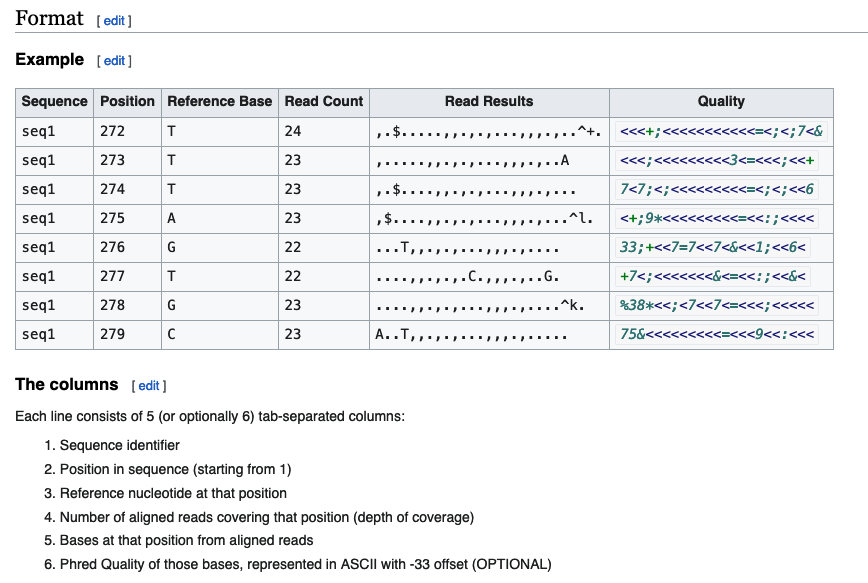

## **2. Variant Calling**
---

In [14]:
#Running VarScan.
!varscan 


VarScan v2.4.6

***NON-COMMERCIAL VERSION***

USAGE: java -jar VarScan.jar [COMMAND] [OPTIONS] 

COMMANDS:
	pileup2snp		Identify SNPs from a pileup file
	pileup2indel		Identify indels a pileup file
	pileup2cns		Call consensus and variants from a pileup file
	mpileup2snp		Identify SNPs from an mpileup file
	mpileup2indel		Identify indels an mpileup file
	mpileup2cns		Call consensus and variants from an mpileup file

	somatic			Call germline/somatic variants from tumor-normal pileups
	mpileup2somatic		Call germline/somatic variants in multi-tumor-normal mpileup (beta feature in v2.4.5)
	copynumber		Determine relative tumor copy number from tumor-normal pileups
	readcounts		Obtain read counts for a list of variants from a pileup file

	filter			Filter SNPs by coverage, frequency, p-value, etc.
	somaticFilter		Filter somatic variants for clusters/indels
	fpfilter		Apply the false-positive filter

	processSomatic		Isolate Germline/LOH/Somatic calls from output
	copyCaller		GC-adjust and pro

In [15]:
#Running VarScan.
!varscan pileup2snp --help


Min coverage:	8
Min reads2:	2
Min var freq:	0.01
Min avg qual:	15
P-value thresh:	0.99
USAGE: java -jar VarScan.jar pileup2cns [pileup file] OPTIONS
	pileup file - The SAMtools pileup file

	OPTIONS:
	--min-coverage	Minimum read depth at a position to make a call [8]
	--min-reads2	Minimum supporting reads at a position to call variants [2]
	--min-avg-qual	Minimum base quality at a position to count a read [15]
	--min-var-freq	Minimum variant allele frequency threshold [0.01]
	--min-freq-for-hom	Minimum frequency to call homozygote [0.75]
	--p-value	Default p-value threshold for calling variants [99e-02]
	--variants	Report only variant (SNP/indel) positions [0]


<div class="alert alert-block alert-warning">
    <h3>2.1 Run VarScan and call variants</h3>
</div>

In [25]:
#Running VarScan.
!varscan mpileup2snp ~/scratch/VariantCalling/SRR710118.mpileup --min-reads2 10 --output-vcf > ~/scratch/VariantCalling/SRR710118.vcf


Only SNPs will be reported
Min coverage:	8
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/ssharma454/scratch/VariantCalling/SRR710118.mpileup
30138130 bases in pileup file
25951 variant positions (25148 SNP, 803 indel)
1506 were failed by the strand-filter
23695 variant positions reported (23695 SNP, 0 indel)


In [26]:
#Check the output file.
!head ~/scratch/VariantCalling/SRR710118.vcf 


##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">


In [28]:
#Check the output file.
!cat ~/scratch/VariantCalling/SRR710118.vcf | grep -v "#" | head

chr16	61473	.	C	T	.	PASS	ADP=25;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:34:25:25:15:10:40%:3.1821E-4:44:35:10:5:9:1
chr16	61497	.	T	C	.	PASS	ADP=27;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:38:27:27:16:11:40.74%:1.362E-4:45:41:9:7:7:4
chr16	61498	.	G	A	.	PASS	ADP=27;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:38:27:27:16:11:40.74%:1.362E-4:46:40:9:7:7:4
chr16	61513	.	T	C	.	PASS	ADP=31;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:50:31:31:17:14:45.16%:9.1194E-6:45:42:9:8:8:6
chr16	61519	.	C	G	.	PASS	ADP=34;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:194:35:34:0:34:100%:3.5146E-20:0:38:0:0:21:13
chr16	61523	.	C	T	.	PASS	ADP=41;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:78:41:41:20:21:51.22%:1.4682E-8:39:33:11:9:14:7
chr16	61532	.	T	G	.	PASS	ADP=41;WT=0;HET=1;HOM=0;NC=0	GT:GQ:

## **3. Miscellaneous**
---

In [29]:
#Check some extra things.
!varscan readcounts ~/scratch/VariantCalling/SRR710118.mpileup --output-file ~/scratch/VariantCalling/SRR710118.readcounts


Min coverage:	1
Min base qual:	20
Reading input from /home/hice1/ssharma454/scratch/VariantCalling/SRR710118.mpileup
30138130 positions in pileup file
30138130 included in readcount analysis
29599561 met minimum coverage


In [30]:
#Check the readcounts.
!head ~/scratch/VariantCalling/SRR710118.readcounts

chrom	position	ref_base	depth	q20_depth	base:reads:strands:avg_qual:map_qual:plus_reads:minus_reads
chr16	60001	T	4	4	T:4:2:33:1:1:3:0	
chr16	60002	A	4	4	A:4:2:34:1:1:3:0	
chr16	60003	A	4	3	A:3:2:37:1:1:2:0	
chr16	60004	C	5	4	C:4:2:37:1:1:3:0	
chr16	60005	C	6	5	C:5:2:34:1:1:4:0	
chr16	60006	C	6	5	C:5:2:35:1:1:4:0	
chr16	60007	T	6	4	T:4:2:32:1:1:3:0	
chr16	60008	A	5	4	A:3:1:35:1:0:3:0	T:1:1:38:1:1:0	
chr16	60009	A	5	4	A:4:2:34:1:1:3:0	


In [31]:
#Check the readcounts.
!head ~/scratch/VariantCalling/SRR710118.readcounts -n10000 | tail

chr16	71011	C	28	28	C:27:2:37:1:11:16:0	G:1:1:34:1:1:0	
chr16	71012	A	28	28	A:28:2:37:1:12:16:0	
chr16	71013	G	28	28	G:27:2:37:1:11:16:0	A:1:1:35:1:1:0	
chr16	71014	T	27	27	T:27:2:37:1:11:16:0	
chr16	71015	A	27	26	A:26:2:38:1:11:15:0	
chr16	71016	T	26	26	T:26:2:37:1:11:15:0	
chr16	71017	T	26	26	T:26:2:37:1:11:15:0	
chr16	71018	A	26	25	A:24:2:40:1:8:16:0	T:1:1:40:1:1:0	
chr16	71019	G	27	25	G:25:2:40:1:10:15:0	
chr16	71020	G	27	26	G:23:2:40:1:8:15:0	A:1:1:40:1:1:0	C:1:1:24:1:1:0	T:1:1:38:1:0:1	


<div class="alert alert-block alert-warning">
    <h3>3.1 See if we can filter the variants</h3>
    <p>We will filter by minimum supporting reads at a position to call variants </p>
</div>

In [43]:
#Check how filtering might work.
!varscan filter ~/scratch/VariantCalling/SRR710118.vcf --min-reads2 25 --output-file ~/scratch/VariantCalling/SRR710118.filtered.vcf 


Min coverage:	10
Min reads2:	25
Min strands2:	1
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.1
Reading input from /home/hice1/ssharma454/scratch/VariantCalling/SRR710118.vcf
23695 entries in input stream
0 had no genotype
0 were called wild-type
0 failed coverage
12886 failed reads2
131 failed strands
0 failed quality
0 failed variant frequency < 0.2
0 failed P-value > 0.1
0 were removed near indels
10678 passed filters


In [44]:
#Check the output file.
!cat ~/scratch/VariantCalling/SRR710118.vcf | grep -v "#" | wc
!cat ~/scratch/VariantCalling/SRR710118.filtered.vcf | grep -v "#" | wc

  23695  236950 3856324
  10678  106780 1775339


In [45]:
#Check the output file.
!cat ~/scratch/VariantCalling/SRR710118.filtered.vcf | grep -v "#" | head

chr16	61519	.	C	G	.	PASS	ADP=34;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:194:35:34:0:34:100%:3.5146E-20:0:38:0:0:21:13
chr16	61554	.	A	G	.	PASS	ADP=49;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:124:51:49:18:31:63.27%:3.6757E-13:44:40:9:9:20:11
chr16	61555	.	C	T	.	PASS	ADP=50;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:128:50:50:18:32:64%:1.2624E-13:46:39:9:9:21:11
chr16	61589	.	T	A	.	PASS	ADP=64;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:165:64:64:23:41:64.06%:2.6828E-17:38:38:11:12:34:7
chr16	61590	.	C	G	.	PASS	ADP=66;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:255:66:66:0:66:100%:2.6498E-39:0:37:0:0:44:22
chr16	61593	.	C	T	.	PASS	ADP=66;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:169:66:66:24:42:63.64%:1.1656E-17:38:38:10:14:35:7
chr16	61594	.	A	G	.	PASS	ADP=66;WT=0;HET=1;

In [46]:
#Check the output file.
!cat ~/scratch/VariantCalling/SRR710118.vcf | grep -v "#" | head

chr16	61473	.	C	T	.	PASS	ADP=25;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:34:25:25:15:10:40%:3.1821E-4:44:35:10:5:9:1
chr16	61497	.	T	C	.	PASS	ADP=27;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:38:27:27:16:11:40.74%:1.362E-4:45:41:9:7:7:4
chr16	61498	.	G	A	.	PASS	ADP=27;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:38:27:27:16:11:40.74%:1.362E-4:46:40:9:7:7:4
chr16	61513	.	T	C	.	PASS	ADP=31;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:50:31:31:17:14:45.16%:9.1194E-6:45:42:9:8:8:6
chr16	61519	.	C	G	.	PASS	ADP=34;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:194:35:34:0:34:100%:3.5146E-20:0:38:0:0:21:13
chr16	61523	.	C	T	.	PASS	ADP=41;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:78:41:41:20:21:51.22%:1.4682E-8:39:33:11:9:14:7
chr16	61532	.	T	G	.	PASS	ADP=41;WT=0;HET=1;HOM=0;NC=0	GT:GQ: